In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

In [65]:
tf.random.set_seed(42)

In [66]:
df = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<Axes: xlabel='DATE'>

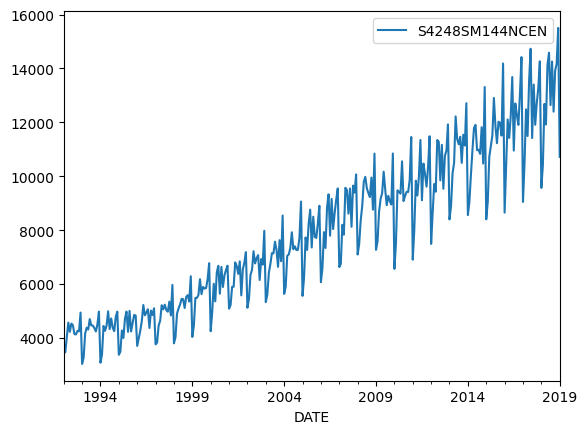

In [67]:
df.plot()

In [68]:
df.rename(columns={'S4248SM144NCEN': 'Sales'}, inplace=True)
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [69]:
results = seasonal_decompose(df['Sales'])

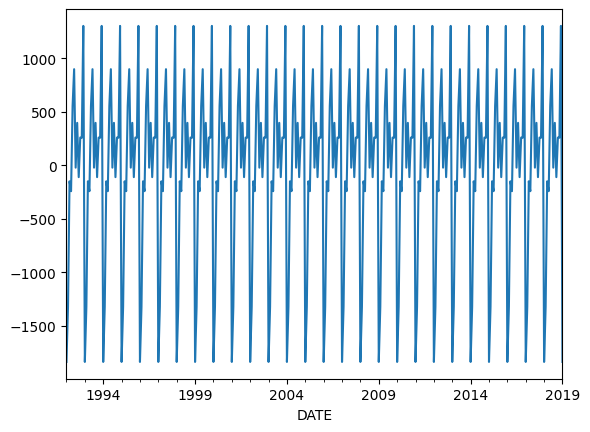

In [70]:
results.seasonal.plot();

In [71]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [72]:
scaler = MinMaxScaler()

In [73]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

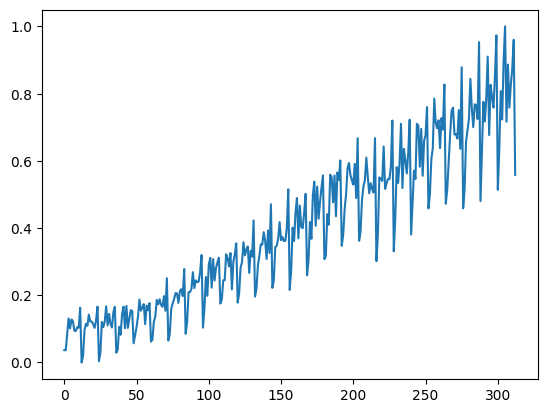

In [74]:
plt.plot(scaled_train)

In [75]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=n_features)

In [76]:
X, y = generator[0]

In [77]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


In [78]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,001 (199.22 KB)

 Trainable params: 51,001 (199.22 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.fit(generator, epochs=250)

Epoch 1/250


106/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0461

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0278
Epoch 2/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105
Epoch 3/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094
Epoch 4/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108
Epoch 5/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0077
Epoch 6/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 7/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0070
Epoch 8/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054
Epoch 9/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041
Epoch 10/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032
Epoch 11/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027
Epoch 12/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019
Epoch 13/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017
Epoch 14/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018
Epoch 15/250
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

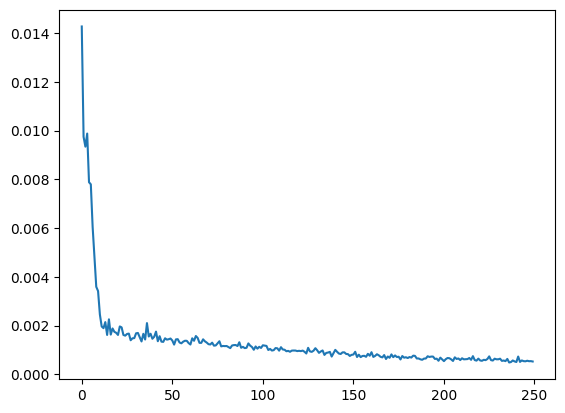

In [81]:
loss_per_epoch = model.history.history['loss']
plt.plot(loss_per_epoch)

In [82]:
prediction = model.predict(scaled_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [83]:
prediction = scaler.inverse_transform(prediction)

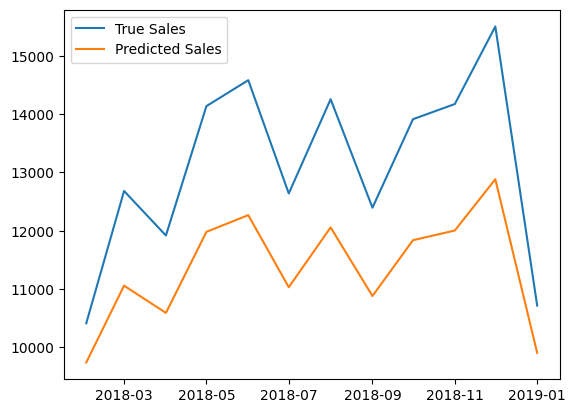

In [84]:
plt.plot(test.index, test['Sales'], label='True Sales')
plt.plot(test.index, prediction, label='Predicted Sales')
plt.legend()